Linear Regression


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving Concrete_Data.xls to Concrete_Data.xls


In [ ]:
import io
data= pd.read_excel(io.BytesIO(uploaded['Concrete_Data.xls']))
data



,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
corr=data.corr



mask=np.triu(np.ones_like(corr,dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

TypeError: ignored

selecting arr delay

In [ ]:
y = data.iloc[:,8].values
print(y)

x = data.iloc[:,[0,1,3,5,6,7]]
print(x)

[79.98611076 61.88736576 40.26953526 ... 23.69660064 32.76803638
 32.40123514]
      Cement (component 1)(kg in a m^3 mixture)  ...  Age (day)
0                                         540.0  ...         28
1                                         540.0  ...         28
2                                         332.5  ...        270
3                                         332.5  ...        365
4                                         198.6  ...        360
...                                         ...  ...        ...
1025                                      276.4  ...         28
1026                                      322.2  ...         28
1027                                      148.5  ...         28
1028                                      159.1  ...         28
1029                                      260.9  ...         28

[1030 rows x 6 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,24.290929,17.792307
1,39.004642,47.951140
2,62.052840,50.277737
3,55.647608,52.365567
4,44.519465,57.668276
...,...,...
201,38.893341,65.652518
202,55.895819,49.677317
203,39.610396,31.486761
204,56.399137,63.194776


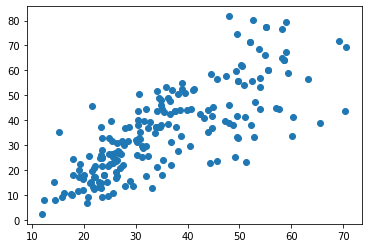

In [ ]:
plt.scatter(y_pred, y_test)

In [ ]:
metrics.r2_score(y_test, y_pred)

0.6140476221372005